# Decision Tree for determining a song's popularity (Loudness vs Energy)

**Importing Relevant Libraries**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

**Loading Dataset**

In [8]:
spotify_df = pd.read_csv("Spotify.csv")

In [9]:
spotify_df

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

**Criterium Setup:** 

*Song scoring >= 60 in popularity feature will be classified as popular otherwise not popular*

In [10]:
spotify_df['is_popular'] = (spotify_df['popularity'] >= 60) & (spotify_df['popularity'] <= 100)
spotify_df['is_popular'] = spotify_df['is_popular'].astype(int)

In [11]:
spotify_df['explicit'] = spotify_df['explicit'].map({True: 1, False: 0})

In [12]:
spotify_df

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666         0   
1                 Ghost - Acoustic          55       149610         0   
2                   To Begin Again          57       210826         0   
3       Can't Help Falling In Love          71       201933         0   
4                          Hold On          82       198853         0   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999         0   
113996            Water Into Light          22       385000         0   
113997              Miss Perfumado          22       271466         0   
113998                     Friends          41       283893         0   
113999                   Barbincor          22       241826         0   

        danceability  energy  ...  mode  speechiness  acousticness  \
0              0.676  0.4610  ...     0       0.1430        0.0322   
1              0.420  0.1660  ...     1       0.0763        0.9240   
2              0.438  0.3590  ...     1       0.0557        0.2100   
3              0.266  0.0596  ...     1       0.0363        0.9050   
4              0.618  0.4430  ...     1       0.0526        0.4690   
...              ...     ...  ...   ...          ...           ...   
113995         0.172  0.2350  ...     1       0.0422        0.6400   
113996         0.174  0.1170  ...     0       0.0401        0.9940   
113997         0.629  0.3290  ...     0       0.0420        0.8670   
113998         0.587  0.5060  ...     1       0.0297        0.3810   
113999         0.526  0.4870  ...     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4

**Slicing dataset for extracting relevant features**

In [13]:
spotify_df = spotify_df.iloc[:,6:22]

In [14]:
spotify_df

duration_ms  explicit  danceability  energy  key  loudness  mode  \
0            230666         0         0.676  0.4610    1    -6.746     0   
1            149610         0         0.420  0.1660    1   -17.235     1   
2            210826         0         0.438  0.3590    0    -9.734     1   
3            201933         0         0.266  0.0596    0   -18.515     1   
4            198853         0         0.618  0.4430    2    -9.681     1   
...             ...       ...           ...     ...  ...       ...   ...   
113995       384999         0         0.172  0.2350    5   -16.393     1   
113996       385000         0         0.174  0.1170    0   -18.318     0   
113997       271466         0         0.629  0.3290    0   -10.895     0   
113998       283893         0         0.587  0.5060    7   -10.889     1   
113999       241826         0         0.526  0.4870    1   -10.204     0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
0            0.1430        0.0322          0.000001    0.3580   0.7150   
1            0.0763        0.9240          0.000006    0.1010   0.2670   
2            0.0557        0.2100          0.000000    0.1170   0.1200   
3            0.0363        0.9050          0.000071    0.1320   0.1430   
4            0.0526        0.4690          0.000000    0.0829   0.1670   
...             ...           ...               ...       ...      ...   
113995       0.0422        0.6400          0.928000    0.0863   0.0339   
113996       0.0401        0.9940          0.976000    0.1050   0.0350   
113997       0.0420        0.8670          0.000000    0.0839   0.7430   
113998       0.0297        0.3810          0.000000    0.2700   0.4130   
113999       0.0725        0.6810          0.000000    0.0893   0.7080   

          tempo  time_signature  track_genre  is_popular  
0        87.917               4     acoustic           1  
1        77.489               4     acoustic           0  
2        76.332               4     acoustic           0  
3       181.740               3     acoustic           1  
4       119.949               4     acoustic           1  
...         ...             ...          ...         ...  
113995  125.995               5  world-music           0  
113996   85.239               4  world-music           0  
113997  132.378               4  world-music           0  
113998  135.960               4  world-music           0  
113999   79.198               4  world-music           0  

[114000 rows x 16 columns]

In [15]:
spotify_df = spotify_df.drop('track_genre', axis=1)

**Assessing the modified dataset**

In [16]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       114000 non-null  int64  
 1   explicit          114000 non-null  int64  
 2   danceability      114000 non-null  float64
 3   energy            114000 non-null  float64
 4   key               114000 non-null  int64  
 5   loudness          114000 non-null  float64
 6   mode              114000 non-null  int64  
 7   speechiness       114000 non-null  float64
 8   acousticness      114000 non-null  float64
 9   instrumentalness  114000 non-null  float64
 10  liveness          114000 non-null  float64
 11  valence           114000 non-null  float64
 12  tempo             114000 non-null  float64
 13  time_signature    114000 non-null  int64  
 14  is_popular        114000 non-null  int32  
dtypes: float64(9), int32(1), int64(5)
memory usage: 12.6 MB


In [17]:
spotify_df.describe()

duration_ms       explicit   danceability         energy  \
count  1.140000e+05  114000.000000  114000.000000  114000.000000   
mean   2.280292e+05       0.085500       0.566800       0.641383   
std    1.072977e+05       0.279626       0.173542       0.251529   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    1.740660e+05       0.000000       0.456000       0.472000   
50%    2.129060e+05       0.000000       0.580000       0.685000   
75%    2.615060e+05       0.000000       0.695000       0.854000   
max    5.237295e+06       1.000000       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        5.309140      -8.258960       0.637553       0.084652   
std         3.559987       5.029337       0.480709       0.105732   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  114000.000000     114000.000000  114000.000000  114000.000000   
mean        0.314910          0.156050       0.213553       0.474068   
std         0.332523          0.309555       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.598000          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature     is_popular  
count  114000.000000   114000.000000  114000.000000  
mean      122.147837        3.904035       0.130018  
std        29.978197        0.432621       0.336324  
min         0.000000        0.000000       0.000000  
25%        99.218750        4.000000       0.000000  
50%       122.017000        4.000000       0.000000  
75%       140.071000        4.000000       0.000000  
max       243.372000        5.000000       1.000000

**Preparation & Design of Decision Tree Model**

*Using Energy and Loudness features to determine song's popularity*

In [19]:
target_column = spotify_df['is_popular']

In [20]:
X = spotify_df[['loudness', 'energy']]

In [21]:
y = spotify_df['is_popular']

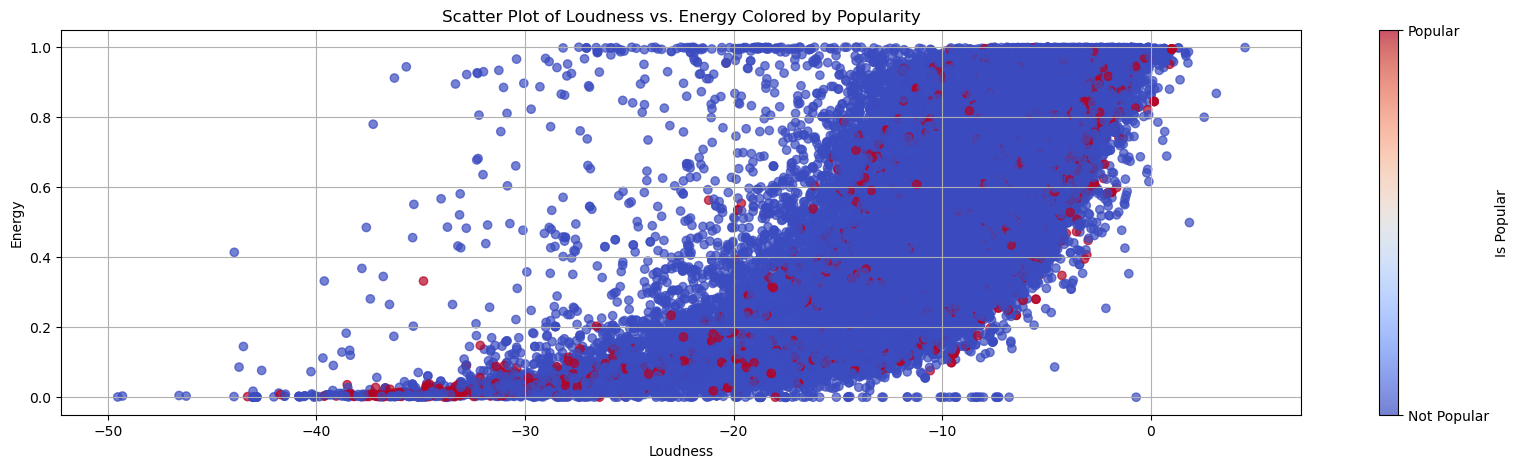

In [22]:
# Assuming your data is in a pandas DataFrame called 'df'

# Create the scatter plot
plt.figure(figsize=(20, 5))  

# Use different colors for 'is_popular' (0 and 1)
plt.scatter(spotify_df['loudness'], spotify_df['energy'], c=spotify_df['is_popular'], cmap='coolwarm', alpha=0.7)

# Add labels and title
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Scatter Plot of Loudness vs. Energy Colored by Popularity')

# Colorbar 
cbar = plt.colorbar()
cbar.set_label('Is Popular')
cbar.set_ticks([0, 1])  
cbar.set_ticklabels(['Not Popular', 'Popular'])  

plt.grid(True)  
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = DecisionTreeClassifier(random_state=42, max_depth=8)

In [25]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [26]:
X_test['loudness']

113186    -6.984
42819     -3.586
59311    -10.071
91368     -5.598
61000     -3.294
           ...  
91204     -5.659
102335   -11.542
107757    -9.578
86528     -6.939
86389    -11.223
Name: loudness, Length: 22800, dtype: float64

In [27]:
y_pred = model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8712280701754386


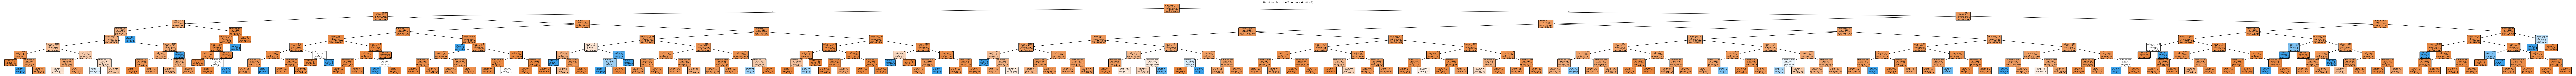

In [31]:
plt.figure(figsize=(220, 6))
plot_tree(model,
          filled=True,
          feature_names=['loudness', 'energy'],  #  feature names
          class_names=['Not Popular', 'Popular'],  # class names
          rounded=True)
plt.title("Simplified Decision Tree (max_depth=8)")
plt.show()

# Decision Tree for determining a song's popularity (Valence vs Danceability)

**Preparation & Design of Decision Tree Model**

*Using danceability and valence features to determine song's popularity*

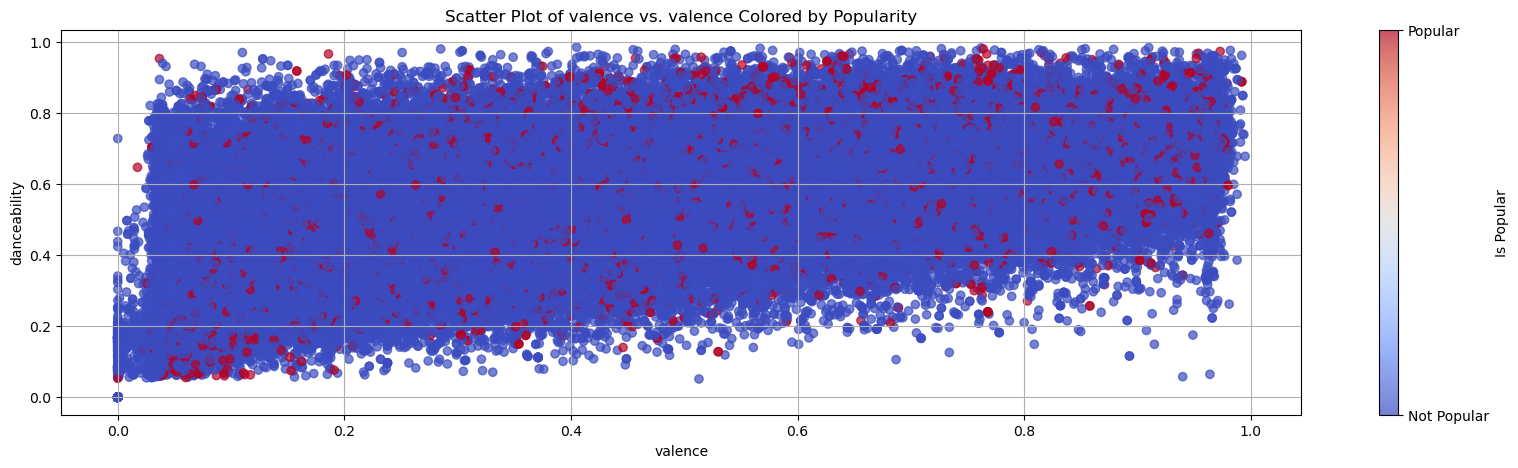

In [32]:
# Create the scatter plot
plt.figure(figsize=(20, 5)) 


plt.scatter(spotify_df['valence'], spotify_df['danceability'], c=spotify_df['is_popular'], cmap='coolwarm', alpha=0.7)

# labels and title
plt.xlabel('valence')
plt.ylabel('danceability')
plt.title('Scatter Plot of valence vs. valence Colored by Popularity')

# Colorbar to serve as the legend
cbar = plt.colorbar()
cbar.set_label('Is Popular')
cbar.set_ticks([0, 1])  #
cbar.set_ticklabels(['Not Popular', 'Popular'])  

plt.grid(True)  
plt.show()

In [33]:
X2 = spotify_df[['valence', 'danceability']]

In [34]:
y2 = spotify_df['is_popular']

In [35]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [36]:
model_2 = DecisionTreeClassifier(random_state=42, max_depth=8)

In [37]:
model_2.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [38]:
X2_test['valence']

113186    0.0466
42819     0.0294
59311     0.0887
91368     0.5980
61000     0.8130
           ...  
91204     0.6530
102335    0.1750
107757    0.5930
86528     0.4630
86389     0.7390
Name: valence, Length: 22800, dtype: float64

In [39]:
y2_pred = model_2.predict(X2_test)

In [40]:
accuracy_2 = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy_2)

Accuracy: 0.8714473684210526


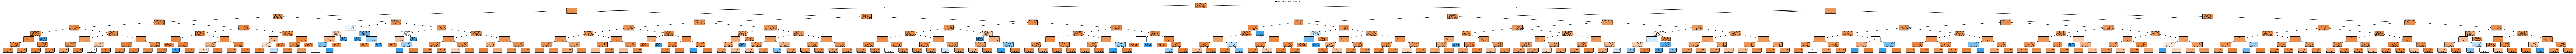

In [41]:
plt.figure(figsize=(400, 8))
plot_tree(model_2,
          filled=True,
          feature_names=['valence', 'danceability'],  # Use your feature names
          class_names=['Not Popular', 'Popular'],  # Use your class names
          rounded=True)
plt.title("Simplified Decision Tree (max_depth=8)")
plt.show()

# Interpretation

**Loudness vs. Energy**

Accuracy: 0.8712

**Valence vs. Danceability**

Accuracy: 0.8714


Both decision tree models demonstrate very similar and relatively high accuracy.  Here's a breakdown:

**High Accuracy:** An accuracy of approximately **87%** indicates that, in both cases, the decision tree model correctly classifies the relationship between the two selected features (Loudness and Energy in one case, Valence and Danceability in the other) the vast majority of the time.

**Loudness and Energy:** For the Loudness vs. Energy model, 87% of the data points are correctly classified by the tree's rules.  This suggests that Loudness and Energy are related in a way that the decision tree can effectively capture.

**Valence and Danceability:** Similarly, for the Valence vs. Danceability model, the tree correctly classifies 87% of the data points.  This indicates that there's a relationship between how danceable a song is and the valence it evokes that the decision tree can learn.

**Slight difference:** The Valence vs. Danceability model has a slightly higher accuracy (0.8714) compared to the Loudness vs. Energy model (0.8712).  This suggests that, in this specific dataset and with this model, the relationship between Valence and Danceability might be very slightly more predictable or easier for the decision tree to model than the relationship between Loudness and Energy.  However, the difference is so small that it's not really significant.

Model Performance: These results imply that decision trees are reasonably effective at discerning patterns between these audio features.
